# Assignment

Now, it's your turn to design your first regression model. In this module, you'll be using a version of the ["House Prices" dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) from Kaggle. This dataset consists of 79 variables describing many aspects of residential homes in Ames, Iowa. Using this data, your task will be to predict the prices of the houses. You can find the descriptions of the variables here: [House Prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

1. Investigate the data and do any necessary data cleaning.
2. Explore the data and find some variables that you think would be useful in the prediction of the house prices.
3. Build your initial model using these features and estimate the parameters using OLS.

In [7]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### 1) Data Cleaning

In [8]:
house_df = pd.read_csv('house_prices.csv')

- Filling categorical empty cells with information

In [9]:
house_df.Alley = house_df.Alley.fillna("No Alley Access")

In [10]:
house_df.FireplaceQu = house_df.FireplaceQu.fillna("No Fireplace")

In [11]:
house_df.PoolQC = house_df.PoolQC.fillna("No pool")

In [12]:
house_df.Fence = house_df.Fence.fillna("No fence")

In [13]:
house_df.MiscFeature = house_df.MiscFeature.fillna("None")

- Filling numerical values with median

In [14]:
#Filling missing values per columns with median values
import pandas.api.types as ptypes
def fix_missing(df, col, name):
    if ptypes.is_numeric_dtype(col):
        df[name] = col.fillna(col.median())

In [15]:
for n, c in house_df.items():
        fix_missing(house_df, c, n)

In [16]:
len(house_df)

1460

- There are left missing values but they are low percentages. Therefore, they can be deleted.

In [17]:
for col in house_df:
    print(house_df[col].name,"= ",sum(pd.isnull(house_df[col]))/len(house_df))

Id =  0.0
MSSubClass =  0.0
MSZoning =  0.0
LotFrontage =  0.0
LotArea =  0.0
Street =  0.0
Alley =  0.0
LotShape =  0.0
LandContour =  0.0
Utilities =  0.0
LotConfig =  0.0
LandSlope =  0.0
Neighborhood =  0.0
Condition1 =  0.0
Condition2 =  0.0
BldgType =  0.0
HouseStyle =  0.0
OverallQual =  0.0
OverallCond =  0.0
YearBuilt =  0.0
YearRemodAdd =  0.0
RoofStyle =  0.0
RoofMatl =  0.0
Exterior1st =  0.0
Exterior2nd =  0.0
MasVnrType =  0.005479452054794521
MasVnrArea =  0.0
ExterQual =  0.0
ExterCond =  0.0
Foundation =  0.0
BsmtQual =  0.025342465753424658
BsmtCond =  0.025342465753424658
BsmtExposure =  0.026027397260273973
BsmtFinType1 =  0.025342465753424658
BsmtFinSF1 =  0.0
BsmtFinType2 =  0.026027397260273973
BsmtFinSF2 =  0.0
BsmtUnfSF =  0.0
TotalBsmtSF =  0.0
Heating =  0.0
HeatingQC =  0.0
CentralAir =  0.0
Electrical =  0.0006849315068493151
1stFlrSF =  0.0
2ndFlrSF =  0.0
LowQualFinSF =  0.0
GrLivArea =  0.0
BsmtFullBath =  0.0
BsmtHalfBath =  0.0
FullBath =  0.0
HalfBath

In [18]:
house_df = house_df.dropna()
house_df.shape[1]

81

Total of 200 rows are deleted after that.

### 2) EDA

In [77]:
import seaborn as sns

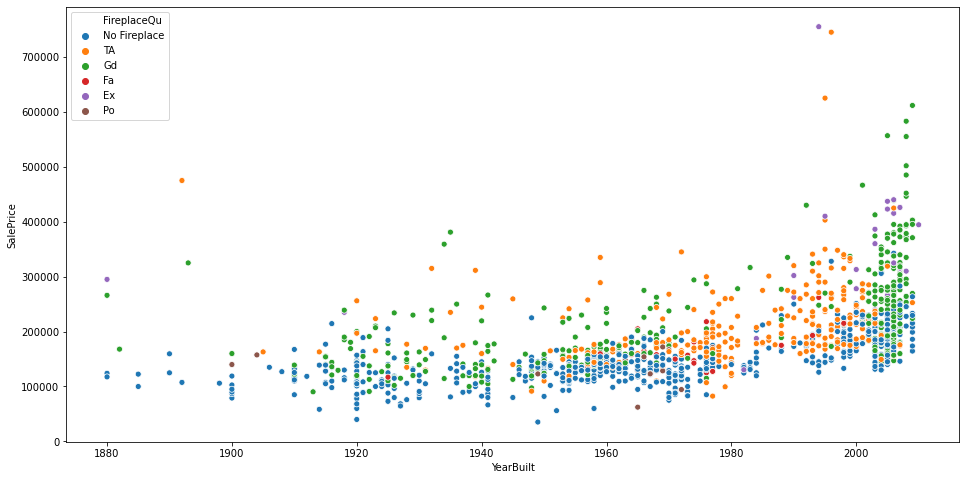

In [99]:
plt.figure(figsize=(16,8))
sns.scatterplot(data=house_df[house_df.LotArea < 40000], x="YearBuilt", y="SalePrice", hue="FireplaceQu")
plt.show()

After trying to get information with visualization, i used correlation values to determine which columns should be used.

Getting numeric values for categorical columns

In [114]:
#Getting categoric columns from dataframe and removing customerid which is unique for each customer.
categoricColumns = house_df.select_dtypes('object').columns.tolist()
categoricColumns.pop(0)
len(categoricColumns)

42

In [116]:
#Creating a new dataframe to concat new numerical columns on. 
numeric_df = pd.DataFrame()
#By using a loop concating all columns in a df
for var in categoricColumns:
    numeric_df = pd.concat([numeric_df, pd.get_dummies(house_df[var], prefix=var)], axis=1)
numeric_df

,Street_Grvl,Street_Pave,Alley_Grvl,Alley_No Alley Access,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,1,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,1,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,1,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,1,0,1,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,1,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,1,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1456,0,1,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1457,0,1,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1458,0,1,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [118]:
#Adding numerical columns and original dataframe to new df.
new_house_df = pd.concat([house_df, numeric_df], axis=1)
new_house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,RL,65.0,8450,Pave,No Alley Access,Reg,Lvl,AllPub,...,0,0,0,1,0,0,0,0,1,0
1,2,20,RL,80.0,9600,Pave,No Alley Access,Reg,Lvl,AllPub,...,0,0,0,1,0,0,0,0,1,0
2,3,60,RL,68.0,11250,Pave,No Alley Access,IR1,Lvl,AllPub,...,0,0,0,1,0,0,0,0,1,0
3,4,70,RL,60.0,9550,Pave,No Alley Access,IR1,Lvl,AllPub,...,0,0,0,1,1,0,0,0,0,0
4,5,60,RL,84.0,14260,Pave,No Alley Access,IR1,Lvl,AllPub,...,0,0,0,1,0,0,0,0,1,0


In [129]:
#Creating a correlation table of new DF.
corrMatrix = new_house_df.corr()

In [139]:
#Putting into a list that has correlation value higher than 0.5
chosenColumns = list(corrMatrix[corrMatrix.SalePrice > 0.5].index)
chosenColumns.remove('SalePrice')
chosenColumns

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'BsmtQual_Ex',
 'KitchenQual_Ex']

### 3) Building model with sci-kit learn

In [ ]:
# Y is the target variable
Y = insurance_df['charges']
# X is the feature set which includes
# is_male and is_smoker variables
X = insurance_df[['is_male','is_smoker']]

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)

In [142]:
#Assigning target variable to y
y = new_house_df['SalePrice']
#Assigning  feature set to X
X = new_house_df[chosenColumns]

#Creating a LinerRegressin model object from sci-kit learn linear_model module
lrm = linear_model.LinearRegression()

#fit method estimates the coefficients using OLS
lrm.fit(X, y)

#Inspecting results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [ 1.59549123e+04  2.66178700e+02  2.55806756e+02  1.11025834e+01
  1.33140632e+01  5.32179817e+01 -4.36734379e+03 -4.52588955e+02
  1.25258574e+04  6.12007540e+00  3.37886045e+04  3.37124995e+04]

Intercept: 
 -1077394.3039618984


### 3) Building model with Statmodels

In [143]:
import statsmodels.api as sm

In [146]:
X = sm.add_constant(X)

results = sm.OLS(y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     420.7
Date:                Sat, 12 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:04:07   Log-Likelihood:                -15935.
No. Observations:                1338   AIC:                         3.190e+04
Df Residuals:                    1325   BIC:                         3.196e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.077e+06   1.32e+05     -8.150      0.000   -1.34e+06   -8.18e+05
OverallQual     1.595e+04   1269.064     12.572      0.000    1.35e+04    1.84e+04
YearBuilt        266.1787     52.878      5.034      0.000     162.446     369.912
YearRemodAdd     255.8068     66.604      3.841      0.000     125.146     386.468
TotalBsmtSF       11.1026      5.995      1.852      0.064      -0.658      22.863
1stFlrSF          13.3141      6.274      2.122      0.034       1.005      25.623
GrLivArea         53.2180      4.194     12.688      0.000      44.989      61.447
FullBath       -4367.3438   2756.241     -1.585      0.113   -9774.416    1039.729
TotRmsAbvGrd    -452.5890   1141.148     -0.397      0.692   -2691.244    1786.066
GarageCars      1.253e+04   3101.733      4.038      0.000    6441.015    1.86e+04
GarageArea         6.1201     10.049      0.609      0.543     -13.593      25.833
BsmtQual_Ex     3.379e+04   4390.936      7.695      0.000    2.52e+04    4.24e+04
KitchenQual_Ex  3.371e+04   4725.872      7.134      0.000    2.44e+04     4.3e+04
==============================================================================
Omnibus:                      713.445   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            83287.818
Skew:                          -1.488   Prob(JB):                         0.00
Kurtosis:                      41.537   Cond. No.                     4.87e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Comment:** According to p-values of model, TotalBsmtSF, FullBath, TotRmsAbvGrd, GarageArea columns are statistically not signifant for 0.95 confidince level. 